# Математична статистика

## Завдання 1

> Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”
> Вважатимемо, що зміна ціни акцій у кожний момент часу дорівнює $ x \sim \Gamma(0.3, 1.1) $, де $ \Gamma $ — позначення гамма-розподілу.
> Необхідно запустити симуляцію $ n = 100 $ разів для різних значень часу $ t $.
> а) Побудуй гістограму розподілу $ x $.
> б) Запусти симуляцію з $ t $ від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.
> Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.

### Розв'язання

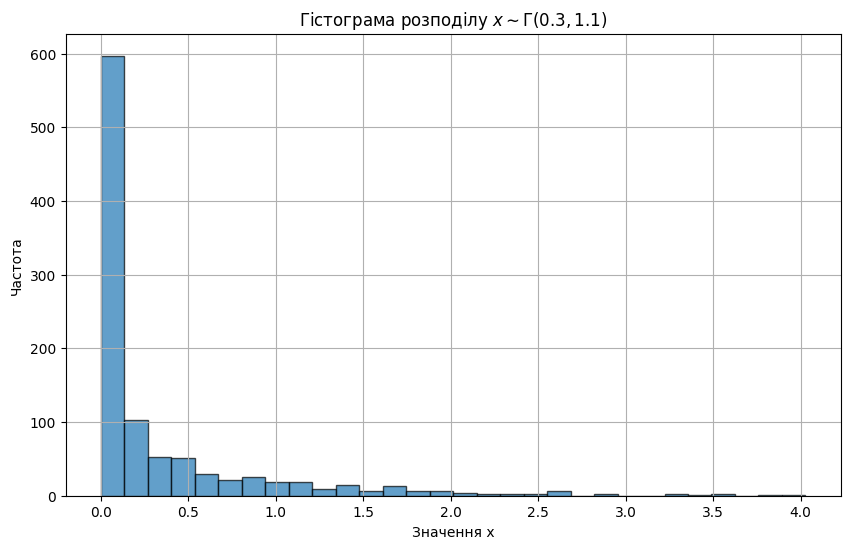

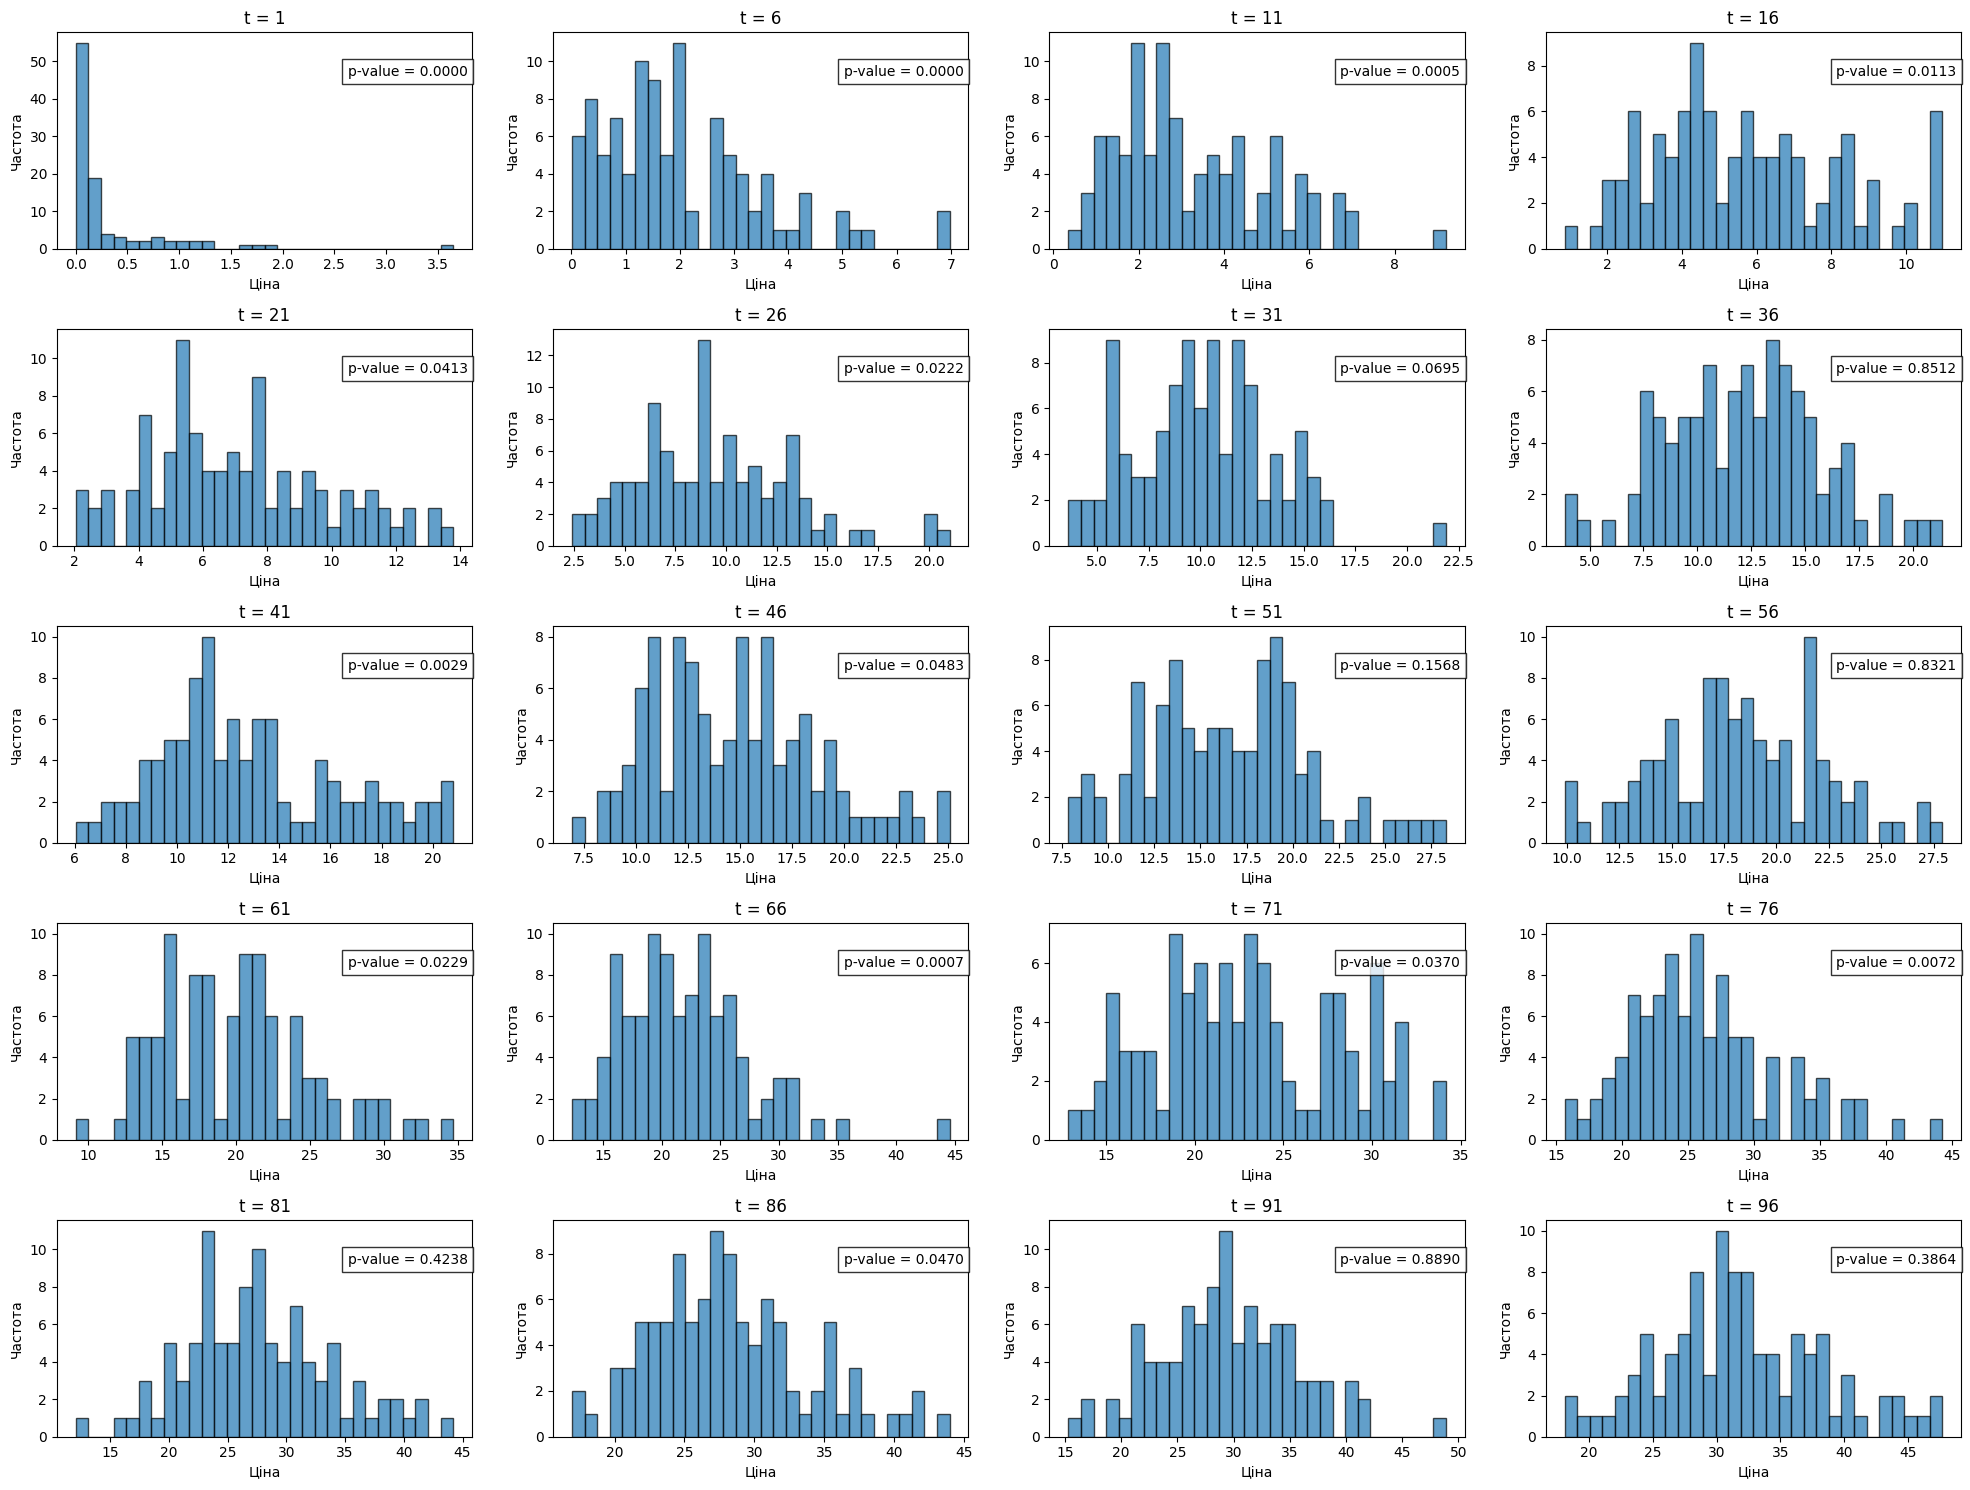

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, shapiro

# Параметри гамма-розподілу
shape, scale = 0.3, 1.1  # Параметри форми і масштабу гамма-розподілу

# Генерація даних з гамма-розподілу
n_samples = 1000
x = gamma.rvs(shape, scale=scale, size=n_samples)

# а) Побудова гістограми для розподілу x
plt.figure(figsize=(10, 6))
plt.hist(x, bins=30, edgecolor='black', alpha=0.7)
plt.title(rf'Гістограма розподілу $x \sim \Gamma({shape}, {scale})$')
plt.xlabel('Значення x')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# б) Симуляція зміни ціни акцій для різних значень часу t
# Збільшуємо кількість кроків t до 100 з кроком 5, щоб краще оцінити динаміку
time_steps = np.arange(1, 101, 5)
n_simulations = 100  # Кількість симуляцій для кожного t
final_prices = []

# Виконуємо симуляцію для кожного значення t та збираємо результати
for t in time_steps:
    prices = [gamma.rvs(shape, scale=scale, size=t).sum() for _ in range(n_simulations)]
    final_prices.append(prices)

# Налаштування відображення: 5 рядів по 4 графіки у кожному (всього 20 графіків)
fig, axs = plt.subplots(5, 4, figsize=(20, 15))
axs = axs.ravel()  # Перетворюємо масив осей в плоский список для зручного доступу

# Відображаємо результати на підграфіках
for i, (t, prices) in enumerate(zip(time_steps, final_prices)):
    axs[i].hist(prices, bins=30, edgecolor='black', alpha=0.7)
    axs[i].set_title(f't = {t}')
    axs[i].set_xlabel('Ціна')
    axs[i].set_ylabel('Частота')

    # Перевірка на нормальність (тест Шапіро-Вілка)
    stat, p_value = shapiro(prices)
    axs[i].text(0.7, 0.8, f'p-value = {p_value:.4f}', transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()  # Автоматично регулюємо макет для уникнення перекриття
plt.show()


### Пояснення

1. **Побудова гістограми для розподілу $x$:**
   
   - Використовуючи гамма-розподіл із заданими параметрами, ми генеруємо 1000 випадкових значень $x$. Гістограма відображає, як ці значення розподілені.

2. **Симуляція зміни ціни акцій для різних значень часу $t$:**
   
   - Ми виконуємо симуляції для значень часу $t$ від 1 до 100 із кроком 5. Кожна симуляція включає 100 повторень для кожного значення $t$. Зібрані результати дозволяють побудувати гістограми для кожного значення $t$, щоб оцінити, як розподіл змінюється з часом.
   
   - Тест Шапіро-Вілка використовується для перевірки нормальності розподілу. Цей тест є одним із стандартних способів оцінки того, наскільки даний розподіл схожий на нормальний.


### **Висновки**

- **Гістограма розподілу $x$:**

   Гамма-розподіл з параметрами $ \Gamma(0.3, 1.1) $ має асиметричну форму, що видно з гістограми.

- **Зміна розподілу зі збільшенням $ t $**:

   Зі збільшенням часу $ t $, розподіл суми змін ціни стає більш схожим на нормальний розподіл, що є наслідком центральної граничної теореми, яка стверджує, що сумарний розподіл великих незалежних випадкових величин (наприклад, зміна ціни в різні моменти часу) буде наближатися до нормального.

---